In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [55]:
#MNIS 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
print("학습셋 이미지 수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d개" % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


In [5]:
import matplotlib.pyplot as plt

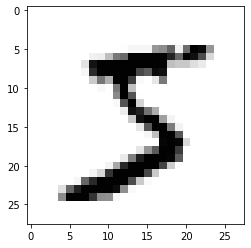

In [16]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [56]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
X_train, X_test = X_train / 255.0, X_test / 255.0

In [49]:
#차원변환 후, 테스트셋과 학습셋으로 나누기
#255=픽셀의 밝기정도 단계
#X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
#X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

In [57]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
del(model)

In [58]:
#모델 구조 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [59]:
#모델 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
#모델 최적화를 위한 설정 구간
modelpath = './data/model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
#모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

In [63]:
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 8s 24ms/step - loss: 0.0331 - accuracy: 0.9922

 Test Accuracy: 0.9922


In [64]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

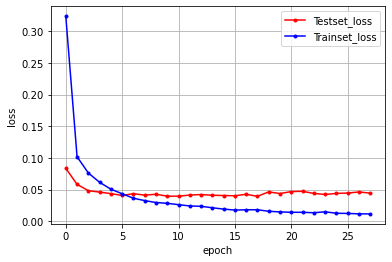

In [66]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()